# Project

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data from project_transactions.csv
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [3]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [4]:
transactions.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06
mean,1.056232e+03,3.404897e+10,3.895059e+02,2.884715e+06,1.009703e+02,3.105908e+00,3.267939e+03,-5.333568e-01,5.632742e+01,-1.579855e-02,-2.805633e-03
std,6.050059e+02,4.723748e+09,1.900530e+02,3.831949e+06,1.152364e+03,4.186300e+00,9.122392e+03,1.229413e+00,2.715024e+01,2.121266e-01,3.924693e-02
min,1.000000e+00,2.698490e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.300200e+02,1.000000e+00,-5.593000e+01,-7.700000e+00
25%,5.480000e+02,3.040798e+10,2.290000e+02,9.172310e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.800000e-01,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.042000e+03,3.281176e+10,3.920000e+02,1.027960e+06,1.000000e+00,2.000000e+00,3.720000e+02,0.000000e+00,5.700000e+01,0.000000e+00,0.000000e+00
75%,1.581000e+03,4.012804e+10,5.550000e+02,1.132771e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
max,2.099000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,1.020000e+02,0.000000e+00,0.000000e+00


In [5]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [6]:
# Changing data types 
transactions = transactions.astype({"DAY": "int16", "QUANTITY": "int32" , "STORE_ID": "int32", "WEEK_NO": "int8"})

In [7]:
# Reduced memory usage
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(1), int32(2), int64(3), int8(1)
memory usage: 137.1 MB


In [8]:
# Check missing value counts 
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [9]:
# unique households
transactions['household_key'].nunique()

2099

In [10]:
# unique product_ids
transactions['PRODUCT_ID'].nunique()

84138

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Overwrite the existing transaction DataFrame after making the modifications above.

In [11]:
# create a discount sum column and a percentage discount column
transactions = transactions.assign(
    total_discount = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"],
    percentage_disount = lambda x: (x['total_discount'] / x['SALES_VALUE']).abs()
).drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis = 1)

transactions["percentage_disount"] = (transactions["percentage_disount"]
                                      .where(transactions["percentage_disount"] < 1, 1.0)
                                      .where(transactions["percentage_disount"] > 0, 0)
                                     )

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_disount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [12]:
# Total Sales Value
total_sales = transactions["SALES_VALUE"].sum()
total_sales 

6666243.499999999

In [13]:
# Total Discount
total_discount = transactions["total_discount"].sum()
total_discount

-1178658.0799999998

In [14]:
# Overall Percent Discount
overall_percentage_discount = total_discount / total_sales
overall_percentage_discount

-0.1768099350106248

In [15]:
# Average of pct_discount column
average_percentage_disount = transactions['percentage_disount'].mean()
average_percentage_disount

0.20732444073964212

In [16]:
# Total Quantity Sold
total_quantity_sold = transactions["QUANTITY"].sum()
total_quantity_sold

216713611

In [17]:
# Max quantity in single row
transactions['QUANTITY'].max()

89638

In [18]:
# row with max value 
transactions.loc[transactions['QUANTITY'].argmax()]

household_key         6.300000e+02
BASKET_ID             3.474915e+10
DAY                   5.030000e+02
PRODUCT_ID            6.534178e+06
QUANTITY              8.963800e+04
SALES_VALUE           2.500000e+02
STORE_ID              3.840000e+02
WEEK_NO               7.300000e+01
total_discount       -1.345000e+01
percentage_disount    5.380000e-02
Name: 1442095, dtype: float64

In [19]:
# Sales value per transaction/basket
total_sales_value_per_basket = total_sales / transactions['BASKET_ID'].nunique()
total_sales_value_per_basket 

28.61797938516092

In [20]:
# Sales value per household
total_sales_value_per_household = total_sales / transactions['household_key'].nunique()
total_sales_value_per_household

3175.9140066698424

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


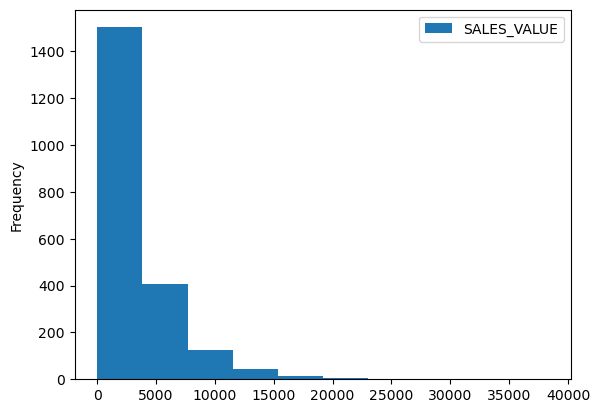

In [21]:
# plot distribution of households by total sales value
transactions.groupby("household_key").agg({"SALES_VALUE":"sum"}).plot.hist();

In [22]:
# top 10 households by total quantity
top_10_households_by_quantity = transactions.groupby("household_key")[["QUANTITY"]].sum().sort_values("QUANTITY", ascending = False)[:10]
top_10_households_by_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [23]:
# top 10 households by total value 
top_10_households_by_value = transactions.groupby("household_key")[["SALES_VALUE"]].sum().sort_values("SALES_VALUE", ascending = False).iloc[:10]
top_10_households_by_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


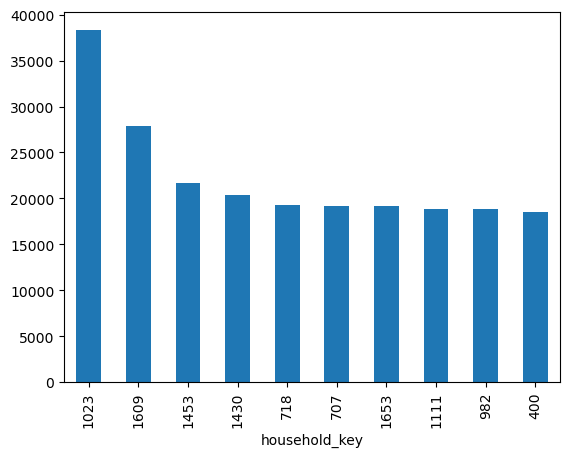

In [24]:
# top 10 households by sales value plotted with a bar plot
top_10_households_by_value['SALES_VALUE'].plot.bar();

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [25]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_disount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [26]:
# Create top 10 products by sales df
# group by PRODUCT_ID and sum sales value by product
# Sort in descending order and grab top 10 rows
top_10_product = transactions.groupby("PRODUCT_ID")[["SALES_VALUE"]].sum().sort_values("SALES_VALUE", ascending = False).iloc[:10]
top_10_product

,SALES_VALUE
PRODUCT_ID,
6534178,420154.13
6533889,42339.31
1029743,33894.75
1082185,24149.79
6533765,23831.14
6534166,23755.70
1106523,22931.01
916122,22749.02
995242,21229.72


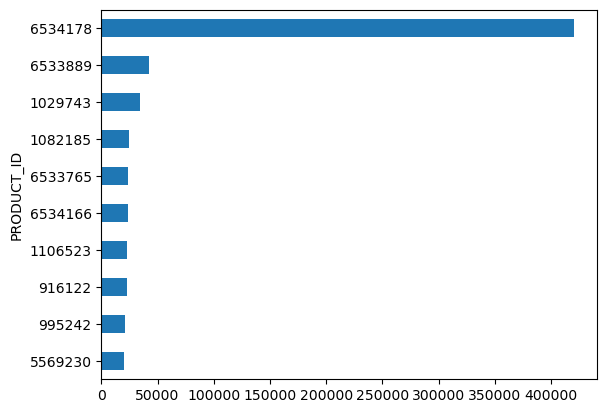

In [27]:
# plot top 10 products by sale value
top_10_product['SALES_VALUE'].sort_values().plot.barh();

In [28]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_disount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [29]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products
(
    (transactions.query("PRODUCT_ID in @top_10_product.index").loc[:, "total_discount"].sum())/
    (transactions.query("PRODUCT_ID in @top_10_product.index").loc[:, "SALES_VALUE"].sum())
)

-0.10331267387397927

In [30]:
# read in products data
product = pd.read_csv("../project_data/product.csv")
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [31]:
# top 10 products for households
top_10_household_products = (transactions.query("household_key in @top_10_households_by_value.index").loc[:, "PRODUCT_ID"].
value_counts().iloc[:10].index)
top_10_household_products

Int64Index([1082185, 1029743, 6534178, 6533889, 1127831,  951590,  860776,
            1106523,  981760, 9677202],
           dtype='int64')

In [32]:
# Filter product table to products from prior cell
product.query("PRODUCT_ID in @top_10_household_products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [33]:
# Product with highest quantity in a single row
product.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [34]:
# Look up 10 product names for all customers (from first cell)
product.query("PRODUCT_ID in @top_10_product.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
